**Task Objective:**

The objective of this task is to implement classifer with Keras in order to classify natural images into one of 8 classes



**Dataset Description:**

A compiled dataset of 6899 images from 8 distinct classes. The Classes are:

- airplane

- car

- cat

- dog

- flower

- fruit

- motorbike

- person


In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3
from PIL import Image
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from random import randint


In [11]:
import zipfile
from google.colab import drive

drive.mount('/content/gdrive/')

zip_ref = zipfile.ZipFile("/content/gdrive/My Drive/ppt/archive (1).zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()


Mounted at /content/gdrive/


**Data Exploration**

In [12]:
def get_images(directory):
    Images = []
    Labels = []  
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'car': 
            label = 0
        elif labels == 'cat':
            label = 1
        elif labels == 'motorbike':
            label = 2
        elif labels == 'dog':
            label = 3
        elif labels == 'fruit':
            label = 4
        elif labels == 'person':
            label = 5
        elif labels == 'flower':
            label = 6
        elif labels == 'airplane':
            label = 7

        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) 
            Images.append(image)
            Labels.append(label)
        
#     return Images, Labels
    return shuffle(Images,Labels,random_state=42) #Shuffle the dataset you just prepared.

In [13]:
import os
os.listdir()

['.config', 'gdrive', 'sample_data']

In [15]:

import os
labels = os.listdir('/tmp/natural_images/')
print(labels)

['car', 'cat', 'motorbike', 'dog', 'fruit', 'person', 'flower', 'airplane']


In [17]:
def get_classlabel(class_code):
    labels = {0:'car', 1:'cat', 2:'motorbike', 3:'dog', 4:'fruit', 5:'person', 6:'flower', 7:'airplane'}
    
    return labels[class_code]

Images, Labels = get_images('/tmp/natural_images/') #Extract the training images from the folders.

Images = np.array(Images, dtype=np.float32) #converting the list of images to numpy array.
Images = Images/255.0
Labels = np.array(Labels)

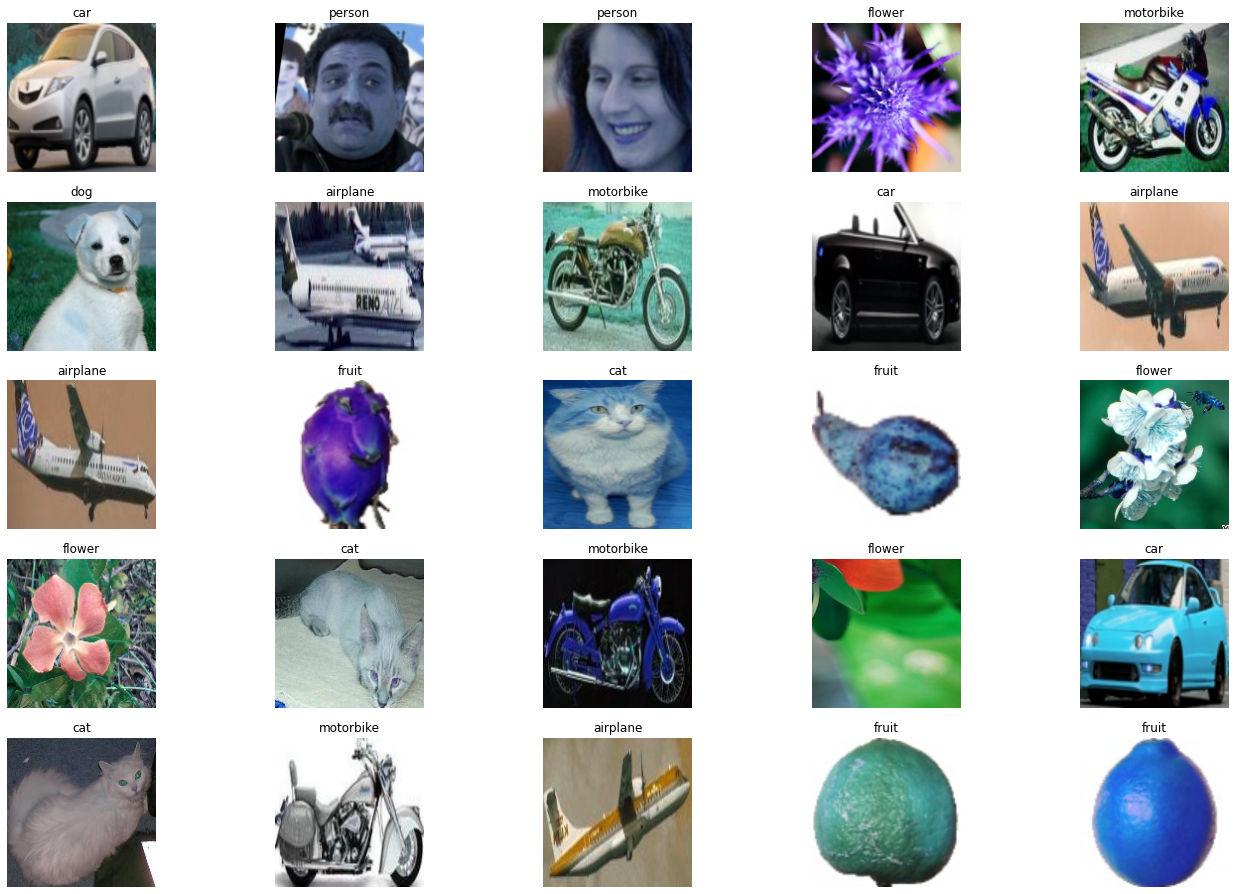

In [19]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')


**Feature Engineering**

In this section, I perform some feature engineering tasks such as scaling, resizing the images

In [33]:


import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)
train_gen = train_datagen.flow_from_directory('/tmp/natural_images',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')
val_gen  = train_datagen.flow_from_directory('/tmp/natural_images',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')


Found 5522 images belonging to 8 classes.
Found 1377 images belonging to 8 classes.


**Building Models**

**Architecture 1: Fully Connected Neural Network**




In [34]:
# Initialising the CNN
fnn = tf.keras.models.Sequential()

# Step 0 - Input shape
fnn.add(tf.keras.layers.Input(shape=(150, 150, 3)))

# Step 1 - Flatten
fnn.add(tf.keras.layers.Flatten())

# Step 2 - Dense Layer 1
fnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

# Step 3 - Dense Layer 2
fnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Step 4 - Dense Layer 3
fnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
fnn.add(tf.keras.layers.Dense(units=8, activation='softmax'))

# Compiling the fnn
fnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

In [35]:
fnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 67500)             0         
                                                                 
 dense_28 (Dense)            (None, 512)               34560512  
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dense_31 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 34,725,768
Trainable params: 34,725,768
Non-trainable params: 0
_________________________________________________________________


In [36]:
history_fnn = fnn.fit(x = train_gen, validation_data = val_gen, epochs = 10)

Epoch 1/10
173/173 [==============================] - 53s 302ms/step - loss: 4.8099 - accuracy: 0.4234 - val_loss: 1.5867 - val_accuracy: 0.5592
Epoch 2/10
173/173 [==============================] - 46s 266ms/step - loss: 1.2215 - accuracy: 0.5989 - val_loss: 1.3185 - val_accuracy: 0.6100
Epoch 3/10
173/173 [==============================] - 47s 269ms/step - loss: 1.0148 - accuracy: 0.6452 - val_loss: 1.1780 - val_accuracy: 0.6463
Epoch 4/10
173/173 [==============================] - 47s 271ms/step - loss: 0.9407 - accuracy: 0.6764 - val_loss: 1.0395 - val_accuracy: 0.6623
Epoch 5/10
173/173 [==============================] - 47s 272ms/step - loss: 0.8690 - accuracy: 0.6907 - val_loss: 1.1993 - val_accuracy: 0.6086
Epoch 6/10
173/173 [==============================] - 47s 272ms/step - loss: 0.8504 - accuracy: 0.6963 - val_loss: 0.9315 - val_accuracy: 0.6790
Epoch 7/10
173/173 [==============================] - 46s 269ms/step - loss: 0.8285 - accuracy: 0.7030 - val_loss: 0.9571 - val_ac

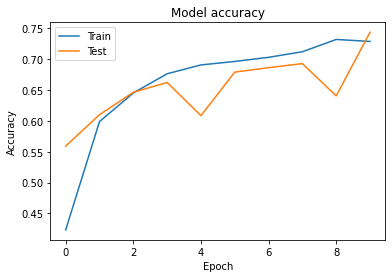

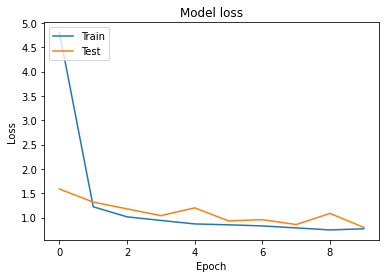

In [37]:
plt.plot(history_fnn.history['accuracy'])
plt.plot(history_fnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history_fnn.history['loss'])
plt.plot(history_fnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Architecture 2: CNN**

In [38]:

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=8, activation='softmax'))

# Part 3 - Training the CNN
# ca
# Compiling the CNN
cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])


In [39]:
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_97 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 41472)             0         
                                                                 
 dense_32 (Dense)            (None, 128)              

In [40]:
history_cnn = cnn.fit(x = train_gen, validation_data = val_gen, epochs = 10)

Epoch 1/10
173/173 [==============================] - 49s 277ms/step - loss: 0.8754 - accuracy: 0.7037 - val_loss: 0.5587 - val_accuracy: 0.7908
Epoch 2/10
173/173 [==============================] - 52s 301ms/step - loss: 0.3730 - accuracy: 0.8611 - val_loss: 0.3963 - val_accuracy: 0.8620
Epoch 3/10
173/173 [==============================] - 55s 316ms/step - loss: 0.2804 - accuracy: 0.8928 - val_loss: 0.3984 - val_accuracy: 0.8526
Epoch 4/10
173/173 [==============================] - 58s 337ms/step - loss: 0.2451 - accuracy: 0.9095 - val_loss: 0.3772 - val_accuracy: 0.8729
Epoch 5/10
173/173 [==============================] - 53s 306ms/step - loss: 0.2115 - accuracy: 0.9216 - val_loss: 0.3878 - val_accuracy: 0.8838
Epoch 6/10
173/173 [==============================] - 48s 277ms/step - loss: 0.1947 - accuracy: 0.9285 - val_loss: 0.2663 - val_accuracy: 0.9049
Epoch 7/10
173/173 [==============================] - 48s 277ms/step - loss: 0.1882 - accuracy: 0.9319 - val_loss: 0.2756 - val_ac

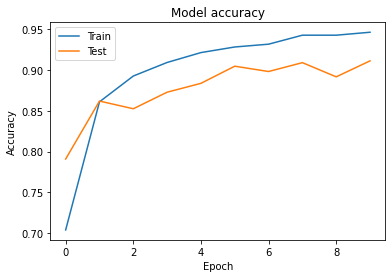

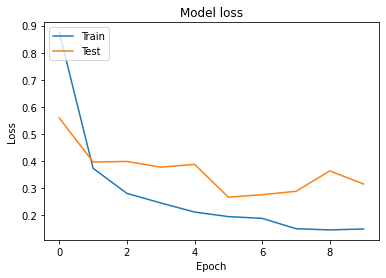

In [41]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**Architecture 3: Transfer Learning using Pretrained InceptionV3 Model**

In [42]:
inceptionV3 = InceptionV3(include_top= False, input_shape=(150,150,3))

for layer in inceptionV3.layers:
	layer.trainable = False

last_layer = inceptionV3.get_layer('mixed9')

print('last layer output shape: ', last_layer.output_shape)

last_output = last_layer.output

x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense  (8, activation = tf.nn.softmax)(x)

model = tf.keras.Model( inceptionV3.input, x)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=1,
                                            verbose=1,
                                            factor=0.25,
                                            min_lr=0.000003)

model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

last layer output shape:  (None, 3, 3, 2048)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_98 (Conv2D)             (None, 74, 74, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_98[0][0]']              
 ormalization)                                                                                    
                                               

In [43]:
history_Inception = model.fit(train_gen,
                    epochs = 10,

                   validation_data = val_gen,
                   callbacks=[learning_rate_reduction])

Epoch 1/10
173/173 [==============================] - 60s 323ms/step - loss: 0.1608 - accuracy: 0.9761 - val_loss: 0.0436 - val_accuracy: 0.9949 - lr: 0.0010
Epoch 2/10
173/173 [==============================] - ETA: 0s - loss: 0.0827 - accuracy: 0.9890
Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
173/173 [==============================] - 56s 323ms/step - loss: 0.0827 - accuracy: 0.9890 - val_loss: 0.0426 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 3/10
173/173 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9978
Epoch 00003: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
173/173 [==============================] - 57s 327ms/step - loss: 0.0139 - accuracy: 0.9978 - val_loss: 0.0248 - val_accuracy: 0.9942 - lr: 2.5000e-04
Epoch 4/10
173/173 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9978
Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
173/173 [=======

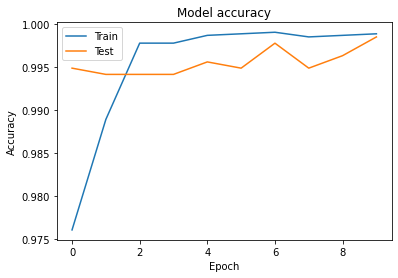

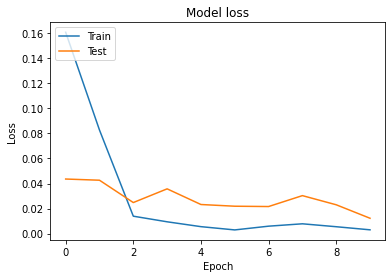

In [44]:
plt.plot(history_Inception.history['accuracy'])
plt.plot(history_Inception.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history_Inception.history['loss'])
plt.plot(history_Inception.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**Key Findings**

I have built 3 deep learning architectures to classify the object in each image. These are Fully Connected Neural Network, CNN, and Transfer learning from Pretrained Inception Model. Inception Model has outperformed CNN and Fully Connected Networks with validation set accuracy of 99.8% compared to 91% and 74.3% accuracy for CNN and Fully connected neural network respectively.

**Suggestions for Next Steps**

Some extra tuning can be carried to improve the performance of the models and to handle overfitting such as add regularization and dropout and run for longer number of epochs. Some pretrained models also can be tried such as VGG and Restnet.